In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [2]:
Metadf = pd.read_csv("MetaData.txt", delimiter="\t")


In [3]:
Metadf = Metadf.T

In [4]:
new_header = Metadf.iloc[0] #grab the first row for the header
Metadf = Metadf[1:] #take the data less the header row
Metadf.columns = new_header #set the header row as the df header

In [5]:

Metadf["Age"] = Metadf["Age"].replace({' NA':np.nan})
Metadf["Age"] = Metadf["Age"].astype(float)
Metadf["Gender"] = Metadf["Gender"].astype(int)
Metadf["Allergy"] = Metadf["Allergy"].astype(int)
Metadf["Asthma"] = Metadf["Asthma"].astype(int)
Metadf["Dermatitis"] = Metadf["Dermatitis"].astype(int)
Metadf["rhinitis"] = Metadf["rhinitis"].astype(int)
Metadf

Metadf.to_csv("cleaned_SwedishData.csv",index = False)

Metadf

!Sample_title,!Sample_geo_accession,Gender,Age,Allergy,Asthma,Dermatitis,rhinitis
Bamse1,GSM4209620,1,195.5592,1,0,1,0
Bamse10,GSM4209621,1,204.0461,0,0,0,0
Bamse100,GSM4209622,0,201.6776,1,1,1,0
Bamse101,GSM4209623,1,205.6250,1,1,0,0
Bamse102,GSM4209624,0,202.8947,0,0,0,0
...,...,...,...,...,...,...,...
Bamse95,GSM4209871,1,201.7105,0,0,0,0
Bamse96,GSM4209872,1,201.5461,1,1,0,1
Bamse97,GSM4209873,0,202.7631,0,0,0,0
Bamse98,GSM4209874,1,203.2237,0,0,0,0


In [6]:
AllergyCount = Metadf["Allergy"].sum()
AsthmaCount = Metadf["Asthma"].sum()
DermatitisCount = Metadf["Dermatitis"].sum()
rhinitisCount = Metadf["rhinitis"].sum()

controlCount = len(Metadf[(Metadf["Allergy"] == 0) & (Metadf["Asthma"] == 0) & 
                          (Metadf["Dermatitis"] == 0) & (Metadf["rhinitis"] == 0)])

allergyToAsthmaCount = len(Metadf[(Metadf["Allergy"] == 0) & (Metadf["Asthma"] == 1)]) 
#Either allergy or control, allergy or Asthma
                        


AllergyCount, AsthmaCount, DermatitisCount, rhinitisCount, controlCount, allergyToAsthmaCount

(156, 98, 68, 85, 100, 0)

<AxesSubplot:xlabel='Gender', ylabel='count'>

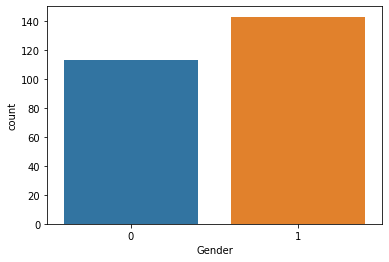

In [7]:
sns.countplot(x = "Gender", data=Metadf)

<AxesSubplot:xlabel='Features', ylabel='count'>

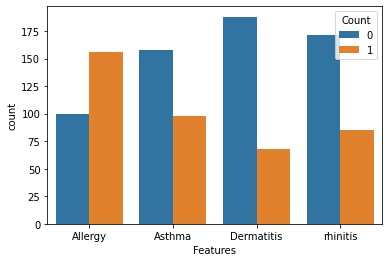

In [19]:
features = ['Allergy', 'Asthma', 'Dermatitis', 'rhinitis']

melted_df = Metadf.melt(id_vars=['!Sample_geo_accession'], value_vars=features, var_name='Features', value_name='Count')

sns.countplot(data=melted_df, x='Features', hue='Count')


<AxesSubplot:xlabel='Allergy', ylabel='count'>

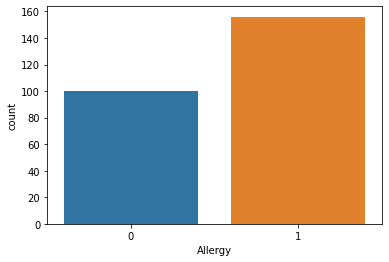

In [20]:
sns.countplot(x = "Allergy", data=Metadf)

<AxesSubplot:xlabel='Asthma', ylabel='count'>

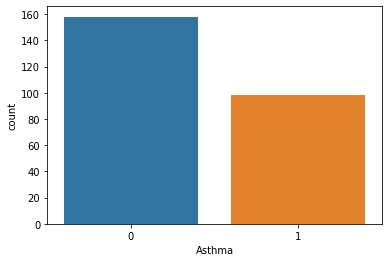

In [21]:
sns.countplot(x = "Asthma", data=Metadf)

<AxesSubplot:xlabel='Dermatitis', ylabel='count'>

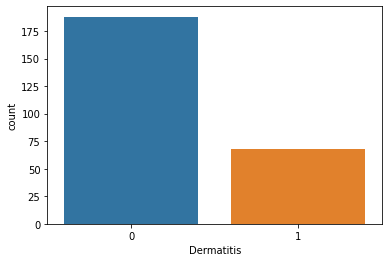

In [22]:
sns.countplot(x = "Dermatitis", data=Metadf)

<AxesSubplot:xlabel='rhinitis', ylabel='count'>

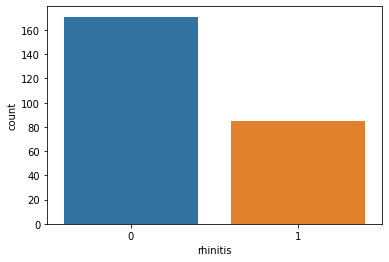

In [33]:
sns.countplot(x = "rhinitis", data=Metadf)

AttributeError: module 'matplotlib' has no attribute 'show'

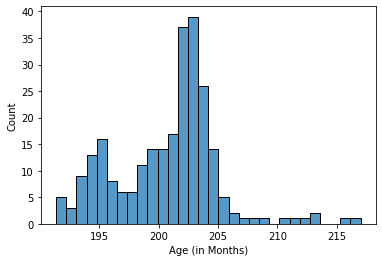

In [22]:
ax = sns.histplot(x = "Age", data=Metadf, bins=30)
ax.set(xlabel='Age (in Months)')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

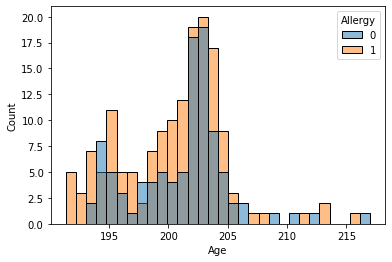

In [26]:
sns.histplot(x = "Age", data=Metadf, hue = "Allergy", bins = 30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

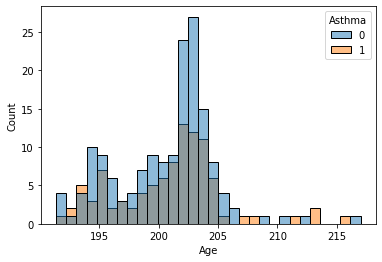

In [27]:
sns.histplot(x = "Age", data=Metadf, hue = "Asthma", bins = 30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

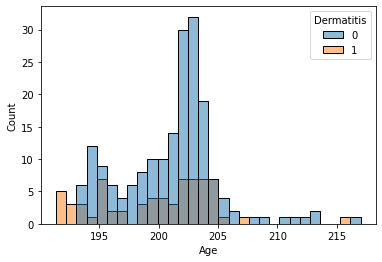

In [28]:
sns.histplot(x = "Age", data=Metadf, hue = "Dermatitis", bins = 30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

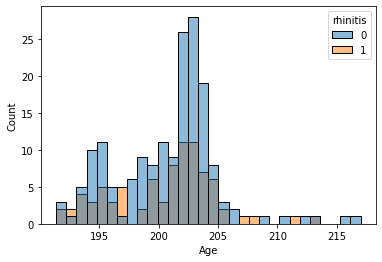

In [30]:
sns.histplot(x = "Age", data=Metadf, hue = "rhinitis", bins = 30)